In [ ]:
#les importations
from roboflow import Roboflow
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt



In [ ]:
# Télécharger un dataset depuis Roboflow
rf = Roboflow(api_key="4zGCDGgIjB5Lg8TVVqSY")
project = rf.workspace("deep-nhhm8").project("my-first-project-prs1r")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


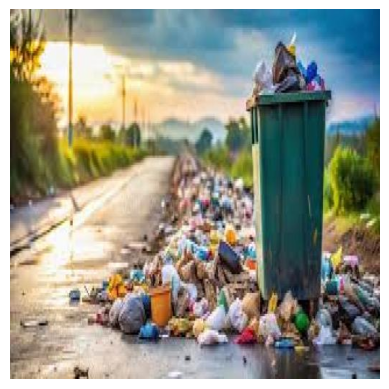

In [25]:
base_path = "My-First-Project-2/train/images"

# Afficher 1 image
img_name = os.listdir(base_path)[1]  
img_path = os.path.join(base_path, img_name)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()


In [ ]:
# Compter le nombre d'images dans chaque split
train_path = "My-First-Project-2/train/images"
val_path = "My-First-Project-2/valid/images"
test_path = "My-First-Project-2/test/images"

print("Nombre d'images train :", len(os.listdir(train_path)))
print("Nombre d'images val   :", len(os.listdir(val_path)))
print("Nombre d'images test  :", len(os.listdir(test_path)))


Nombre d'images train : 345
Nombre d'images val   : 25
Nombre d'images test  : 25


In [ ]:
# Charger un modèle YOLOv8 pré-entraîné
model = YOLO("yolov8n.pt")


In [ ]:
# Entraînement
model.train(
    data="My-First-Project-2/data.yaml",   
    epochs=50,          
    imgsz=640,          
    batch=16,           
    workers=4,          
    name="model_poubelle",  
)

Ultralytics 8.3.229  Python-3.10.18 torch-2.9.1+cpu CPU (Intel Core i7-7600U 2.80GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=My-First-Project-2/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=model_poubelle2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000255216D7940>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.048

In [21]:
#tester le modèle entraîné sur une image
model = YOLO("runs/detect/model_poubelle2/weights/best.pt")
results = model("img.png", show=True)



image 1/1 c:\Users\HP\Desktop\M2\DL\projet_poubelle\img.png: 640x640 2 poubelle_vides, 310.3ms
Speed: 14.3ms preprocess, 310.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# Évaluation sur le jeu de validation
metrics = model.val(data="My-First-Project-2/data.yaml")  # le yaml contient les chemins et classes
print(metrics)  # Affiche mAP, precision, recall, etc.

Ultralytics 8.3.229  Python-3.10.18 torch-2.9.1+cpu CPU (Intel Core i7-7600U 2.80GHz)


val: Fast image access  (ping: 0.91.1 ms, read: 38.027.9 MB/s, size: 35.8 KB)
val: Scanning C:\Users\HP\Desktop\M2\DL\projet_poubelle\My-First-Project-2\valid\labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 25/25 23.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 3.4s/it 6.8s<14.8s
                   all         25         36      0.586      0.722      0.669      0.392
       poubelle_pleine         18         27      0.803      0.667       0.82      0.476
         poubelle_vide          8          9      0.368      0.778      0.518      0.308
Speed: 7.1ms preprocess, 250.4ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to C:\Users\HP\Desktop\M2\DL\projet_poubelle\runs\detect\val4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.Confusion